In [1]:
from collections import defaultdict
from datetime import datetime
import dill
from itertools import permutations, combinations
import json
from operator import itemgetter
import os

import pandas as pd
import numpy as np
#import dill
import os
from datetime import datetime
import json
import seaborn as sns
import gensim
import glob
import csv
import pickle
import random
import re
import time

import numpy as np
import pandas as pd
import little_mallet_wrapper as lmw
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
sns.set(style='ticks', font_scale=1.2)

#from little_mallet_wrapper import train_topic_model

In [2]:
%matplotlib inline

In [3]:
def recode_topics(topic_keys,recoded_topics=None, training_data=None, topic_distributions=None):
    from IPython.display import clear_output

    final_recoded_topics =[]
    if recoded_topics:
        print("recoded_topics present")
        final_recoded_topics =[]
        for i in range(len(recoded_topics)):
            recoded_topic = recoded_topics[i]
            raw_topic = topic_keys[i]
            print("Manual label: ", recoded_topic)
            print()
            print("Original topic key: ", raw_topic)
            print()
            if training_data and topic_distributions:
                top_docs = lmw.get_top_docs(training_data, topic_distributions, i, n=5)
                print("Top Documents")
                print()
                for doc in top_docs:
                    print("Topic Probability: ", doc[0])
                    print(doc[1])
                    print()
            recoded = input()
            if recoded =="":
                final_recoded_topics.append(recoded_topic)
            else:
                final_recoded_topics.append([recoded])
            clear_output(wait=False)
    else:
        print("original topic keys only")
        for i in range(len(topic_keys)):
            raw_topic = topic_keys[i]
            print("Original topic key: ", raw_topic)
            print()
            if training_data and topic_distributions:
                top_docs = lmw.get_top_docs(training_data, topic_distributions, i, n=5)
                print("Top Documents")
                print()
                for doc in top_docs:
                    print("Topic Probability: ", doc[0])
                    print(doc[1])
                    print()
            recoded = input()
            if recoded =="":
                final_recoded_topics.append(recoded_topic)
            else:
                final_recoded_topics.append([recoded])
            clear_output(wait=False)
            
    return final_recoded_topics


In [4]:
def replace_topics(recoded_topics, searched, replace):
    return [[replace] if topic == [searched] else topic for topics in recoded_topics]

<br><br>

# Topic modeling - unsampled reddit posts

In [13]:
#posts_df = pd.read_csv("/Users/lm638/Box/birth-control-project/cleaned-data/reddit-2020-final.csv")
posts_df = pd.read_csv("/Users/lm638/Box/birth-control-project/reddit/data/2020/un-sampled-posts.csv")
len(posts_df)

89035

In [14]:
len(posts_df)

89035

In [15]:
training_documents = []
dates = []

for i, _row in posts_df.iterrows():
    if not pd.isnull(_row['text']):
        training_documents.append(lmw.process_string(_row['text']))
        dates.append(_row['date'])
        
len(training_documents), len(dates)

(89035, 89035)

In [16]:
print(training_documents[20])

nuvaring year started time boyfriend started sex intercourse always painful figured dryness despite much foreplay even lube still painful burning sensation sex still attributed symptoms deficiencies spoke friend mine nuvaring said experienced pain stopped birth control together paranoid pregnancy want stop birth control tired method birth control getting way enjoying sex time life supposed lots awesome sex considered switching pill anyone done could give insight nuvaring causing pain sex considering switch pills experience advice


In [1]:

num_topics = 30
mallet_path = '/Users/lm638/Box/mallet-2.0.8/bin/mallet'
# GENRE OUTPUT PATHS
base_path = '/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/unsampled-posts'


In [6]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                    base_path,
                  num_topics,
                  training_documents)


Importing data...
Complete
Training topic model...
Complete


In [45]:
recoded_topics=[]
for topic in topic_keys:
    print(topic)
    recoded = input()
    recoded_topics.append([recoded])
    

['blood', 'discharge', 'brown', 'spotting', 'like', 'period', 'normal', 'bleeding', 'red', 'light', 'ago', 'noticed', 'since', 'days', 'little', 'week', 'started', 'dark', 'last', 'bit']
bleeding, spotting, discharge
['pregnancy', 'period', 'test', 'pregnant', 'NUM', 'negative', 'sex', 'took', 'month', 'since', 'weeks', 'week', 'tests', 'late', 'last', 'know', 'still', 'two', 'get', 'time']
late period, pregnancy tests
['NUM', 'insertion', 'pain', 'iud', 'felt', 'took', 'like', 'didn', 'went', 'got', 'cervix', 'cramps', 'experience', 'doctor', 'feel', 'procedure', 'day', 'would', 'appointment', 'minutes']
iud insertion, pain, cramps
['pill', 'day', 'take', 'took', 'last', 'pack', 'sunday', 'pills', 'week', 'start', 'today', 'sex', 'taking', 'monday', 'night', 'saturday', 'friday', 'new', 'NUM', 'next']
starting new pill pack, days of week
['nexplanon', 'implant', 'got', 'NUM', 'arm', 'removed', 'get', 'anyone', 'getting', 'years', 'inserted', 'like', 'one', 'implanon', 'would', 'since'

In [46]:
print(recoded_topics)

[['bleeding, spotting, discharge'], ['late period, pregnancy tests'], ['iud insertion, pain, cramps'], ['starting new pill pack, days of week'], ['requests for implant experience'], ['help on starting birth control'], ['iud string complications'], ['condoms, unprotected sex, pregnancy concerns'], ['switching pills'], ['bleeding, spotting, changes in period'], ['effectiveness of condoms and other methods'], ['costs, insurance, planned parenthood'], ['migraines, blood clots and hormones'], ['advice-seeking'], ['missed pills and timing'], ['nausea, breast soreness, side effects'], ['pain, cramping'], ['requests for iud experiences'], ['changes in cycle and months'], ['doctor appointments'], ['really want know - curiosity'], ['requests for side effect stories'], ['acne and hair loss'], ['weight gain'], ['anxiety, depression, mood swings'], ['placebo/active, skipping pills'], ['sex drive'], ['ring experience'], ['changes in cycle'], ['shot experience']]


In [40]:
final_recoded_topics =[]
for i in range(len(recoded_topics)):
    recoded_topic = recoded_topics[i]
    raw_topic = topic_keys[i]
    print(recoded_topic)
    print(raw_topic)
    recoded = input()
    if recoded =="":
        final_recoded_topics.append(recoded_topic)
    else:
        final_recoded_topics.append([recoded])

['changes in period, spotting, bleeding']
['NUM', 'period', 'days', 'periods', 'day', 'first', 'months', 'heavy', 'cycle', 'cramps', 'month', 'normal', 'bleeding', 'light', 'spotting', 'regular', 'last', 'since', 'every', 'long']

['switching pills']
['NUM', 'control', 'birth', 'pill', 'taking', 'pills', 'started', 'switched', 'tri', 'years', 'different', 'switch', 'generic', 'loestrin', 'anyone', 'doctor', 'sprintec', 'brand', 'new', 'month']

['placebo/active, starting new pill pack']
['pills', 'period', 'week', 'pill', 'pack', 'taking', 'start', 'NUM', 'placebo', 'take', 'day', 'started', 'active', 'new', 'days', 'month', 'first', 'next', 'last', 'control']

['copper and hormonal iud inquiries']
['birth', 'control', 'iud', 'hormonal', 'want', 'would', 'get', 'like', 'pill', 'really', 'copper', 'side', 'options', 'method', 'effects', 'also', 'periods', 'option', 'pills', 'hormones']

['missed pills and contraceptive timing']
['NUM', 'pill', 'take', 'day', 'took', 'sex', 'taking', 'ti

### Plotting Topics Over Time


In [57]:
##adjusting date formats
datetimes =[]
for x in dates:
    datetime_obj = datetime.fromisoformat(x)
    datetimes.append(datetime_obj)

In [58]:
years=[]
for datetime in datetimes:
    years.append(datetime.year)

In [ ]:
##unsampled output
for index in range(len(topic_keys)):
    lmw.plot_topics_over_time(topic_distributions, recoded_topics, years, index, output_path=None)


### Plotting Heatmaps

In [44]:
## get topic_keys from unsampled data
topic_keys = lmw.load_topic_keys("/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/unsampled-posts/mallet.topic_keys.30")
topic_distributions = lmw.load_topic_distributions("/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/unsampled-posts/mallet.topic_distributions.30")
                        

In [49]:
## get flairs and types 
types = posts_df["txt_title_type"]
flairs = posts_df["flair"]

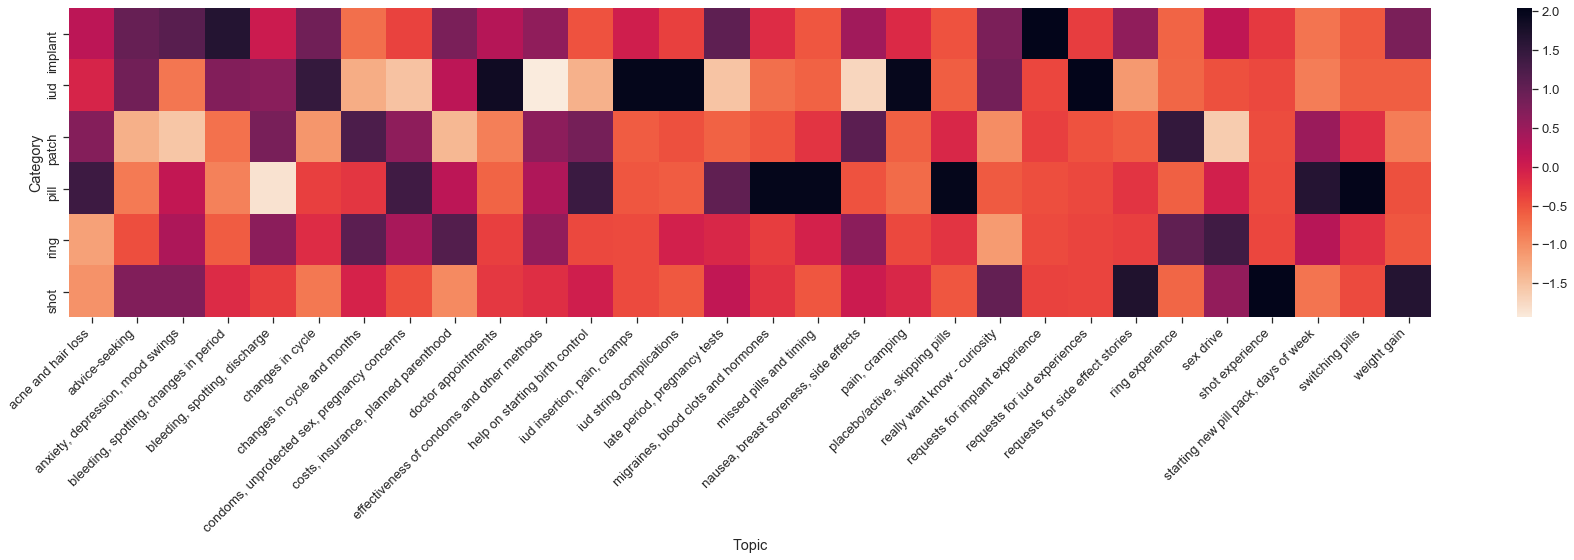

In [52]:
lmw.plot_categories_by_topics_heatmap(types, topic_distributions, recoded_topics, output_path=None, target_labels=None, dim=(25,8))


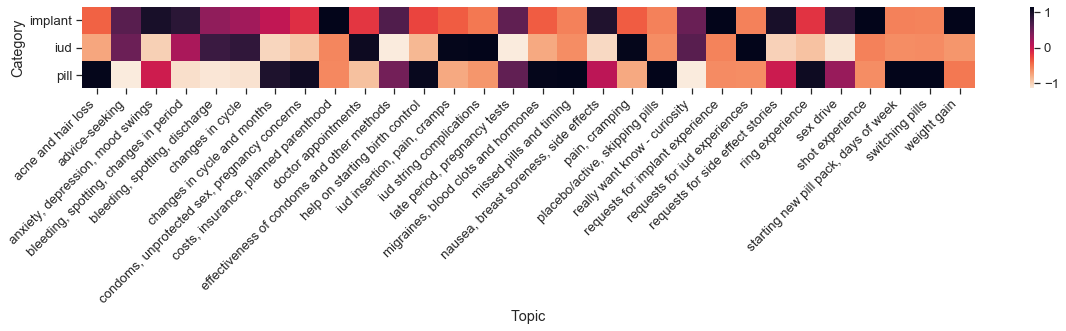

In [55]:
lmw.plot_categories_by_topics_heatmap(types, topic_distributions, recoded_topics, output_path=None, target_labels=['pill', 'iud', 'implant'], dim=(20,1.5))


## Topic Modeling -- Over-Sampled Posts

In [116]:
posts_df = pd.read_csv("/Users/lm638/Box/birth-control-project/reddit/data/2020/reddit_classified_sampled_posts_2020.csv")

In [117]:
posts_df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,year,flair,text,title,type,token_text,token_title,text_type,title_type,txt_title_type
0,0,9187,32o1q4,2015-04-15 09:37:24,2015.0,NaN,"I got the implant on April 2 of this year, so ...",how long should you wait to have unprotected s...,post,"['i', 'got', 'the', 'implant', 'on', 'april', ...","['how', 'long', 'should', 'you', 'wait', 'to',...",implant,implant,implant
1,1,6877,2ft1yn,2014-09-08 13:47:01,2014.0,NaN,Hi ladies! I had my Nexplanon inserted Saturda...,day 3 of nexplanon and i can't feel it??,post,"['hi', 'ladies!', 'i', 'had', 'my', 'nexplanon...","['day', '3', 'of', 'nexplanon', 'and', 'i', ""c...",implant,implant,implant
2,2,8704,30hod9,2015-03-27 13:49:17,2015.0,NaN,So I started Implanon about over six months ag...,[21f] implanon question,post,"['so', 'i', 'started', 'implanon', 'about', 'o...","['[21f]', 'implanon', 'question']",implant,implant,implant
3,3,33966,8j156h,2018-05-13 03:06:31,2018.0,side effects!?,I've have the Nexplanon inserted 2 1/2 years a...,periods while on nexplanon,post,"[""i've"", 'have', 'the', 'nexplanon', 'inserted...","['period', 'while', 'on', 'nexplanon']",implant,implant,implant
4,4,65326,eloyeh,2020-01-08 06:28:48,2020.0,side effects!?,Yeah this is a dumb question but I got my nexp...,can i sleep on my arm which has nexplanon?,post,"['yeah', 'this', 'is', 'a', 'dumb', 'question'...","['can', 'i', 'sleep', 'on', 'my', 'arm', 'whic...",implant,NaN,implant


In [118]:
training_documents = []
dates = []

for i, _row in posts_df.iterrows():
    if not pd.isnull(_row['text']):
        training_documents.append(lmw.process_string(_row['text']))
        dates.append(_row['date'])
        
len(training_documents), len(dates)

(120000, 120000)

In [119]:
print(training_documents[20])

nexplanon little two years boyfriend unprotected sex march NUMth didn finish period march NUMst april NUMth wednesday past week started cramping little brown spotting next three days took pregnancy test also wednesday negative okay sorry little paranoid


In [120]:

num_topics = 30
mallet_path = '/Users/lm638/Box/mallet-2.0.8/bin/mallet'
# GENRE OUTPUT PATHS
base_path = '/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/oversampled-posts'


In [121]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                    base_path,
                  num_topics,
                  training_documents)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/sampled-posts/training.txt'

In [35]:
for topic in topic_keys:
    print(topic)

['pain', 'anyone', 'else', 'side', 'like', 'experienced', 'cramps', 'started', 'also', 'back', 'normal', 'symptoms', 'since', 'yeast', 'ago', 'sore', 'infection', 'breasts', 'week', 'lower']
['NUM', 'period', 'NUMth', 'days', 'day', 'got', 'started', 'first', 'since', 'week', 'start', 'cycle', 'june', 'last', 'sex', 'wait', 'april', 'july', 'may', 'still']
['pill', 'NUM', 'doctor', 'migraines', 'blood', 'years', 'periods', 'estrogen', 'taking', 'birth', 'control', 'pain', 'mini', 'pills', 'take', 'risk', 'also', 'told', 'due', 'pcos']
['birth', 'control', 'want', 'hormonal', 'know', 'would', 'like', 'pills', 'effects', 'form', 'years', 'pill', 'side', 'get', 'taking', 'method', 'using', 'also', 'time', 'getting']
['get', 'NUM', 'insurance', 'doctor', 'told', 'would', 'appointment', 'said', 'planned', 'want', 'parenthood', 'one', 'went', 'prescription', 'health', 'know', 'going', 'called', 'back', 'could']
['NUM', 'pregnancy', 'pregnant', 'test', 'period', 'sex', 'negative', 'took', 'we

In [36]:
recoded_topics=[]
for topic in topic_keys:
    print(topic)
    recoded = input()
    recoded_topics.append([recoded])
    

['pain', 'anyone', 'else', 'side', 'like', 'experienced', 'cramps', 'started', 'also', 'back', 'normal', 'symptoms', 'since', 'yeast', 'ago', 'sore', 'infection', 'breasts', 'week', 'lower']
cramps, yeast infections, breast soreness
['NUM', 'period', 'NUMth', 'days', 'day', 'got', 'started', 'first', 'since', 'week', 'start', 'cycle', 'june', 'last', 'sex', 'wait', 'april', 'july', 'may', 'still']
start of cycle
['pill', 'NUM', 'doctor', 'migraines', 'blood', 'years', 'periods', 'estrogen', 'taking', 'birth', 'control', 'pain', 'mini', 'pills', 'take', 'risk', 'also', 'told', 'due', 'pcos']
migraines, pcos
['birth', 'control', 'want', 'hormonal', 'know', 'would', 'like', 'pills', 'effects', 'form', 'years', 'pill', 'side', 'get', 'taking', 'method', 'using', 'also', 'time', 'getting']
seeking new methods
['get', 'NUM', 'insurance', 'doctor', 'told', 'would', 'appointment', 'said', 'planned', 'want', 'parenthood', 'one', 'went', 'prescription', 'health', 'know', 'going', 'called', 'back

In [37]:
print(recoded_topics)

[['cramps, yeast infections, breast soreness'], ['start of cycle'], ['migraines, pcos'], ['seeking new methods'], ['costs, insurance, planned parenthood'], ['late periods, pregnancy concerns'], ['condom-related pregnancy concerns'], ['patch experiences'], ['ring experiences'], ['side effects, headaches, nausea'], ['acne and hair loss'], ['ring experiences'], ['active/placebo, skipping pills'], ['weight fain'], ['informative outlinks'], ['copper and hormonal iud experiences'], ['iud insertion and string complications'], ['implant insertion'], ['unprotected sex and emergency contraception'], ['implant removal'], ['iud insertion, pain'], ['spotting, bleeding, discharge'], ['starting the patch'], ['really want know - curiosity'], ['sex drive, libido'], ['shot information seeking'], ['experience and advice-seeking'], ['changes in period'], ['lighter periods'], ['anxiety, depression, mood swings']]


In [38]:


recoded_topics = [['cramps, yeast infections, breast soreness'], ['start of cycle'], ['migraines, pcos'], ['seeking new methods'], 
                  ['costs, insurance, planned parenthood'], ['late periods, pregnancy concerns'], ['condom-related pregnancy concerns'], ['patch placement'], 
                  ['ring questions'], ['side effects, headaches, nausea'], ['acne and hair loss'],
                  ['ring experiences'], ['active/placebo, skipping pills'], ['weight fain'],
                  ['informative outlinks'], ['copper and hormonal iud experiences'], 
                  ['iud string complications'], ['implant insertion'], ['unprotected sex and emergency contraception'], ['implant removal'], 
                  ['iud insertion, pain'], ['spotting, bleeding, discharge'], ['starting the patch'],
                  ['really want know - curiosity'], ['sex drive, libido'], ['shot information seeking'], 
                  ['experience and advice-seeking'], ['spotting, heavier periods'], ['spotting, lighter periods'], ['anxiety, depression, mood swings']]



In [40]:
len(recoded_topics)

30

In [48]:
dates[0]

'2015-04-15 09:37:24'

In [52]:
datetimes =[]
for x in dates:
    #datetime_obj = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    datetime_obj = datetime.fromisoformat(x)
    datetimes.append(datetime_obj)

In [53]:
years=[]
for datetime in datetimes:
    years.append(datetime.year)

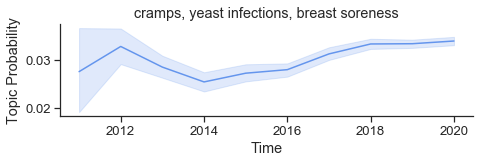

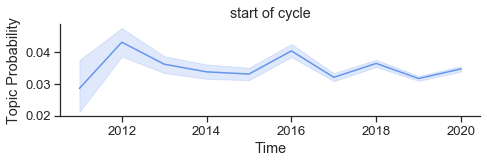

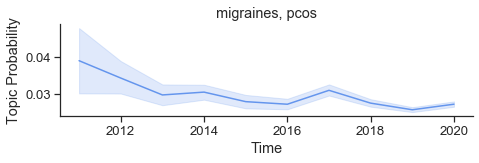

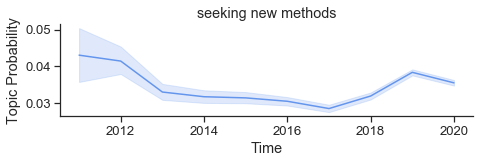

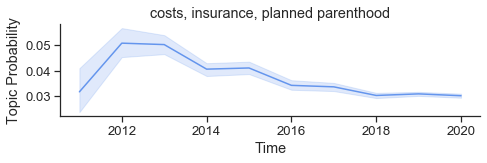

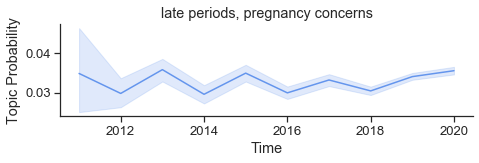

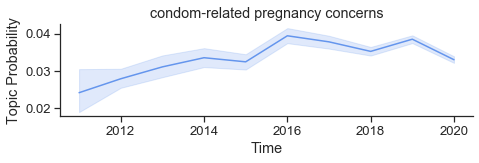

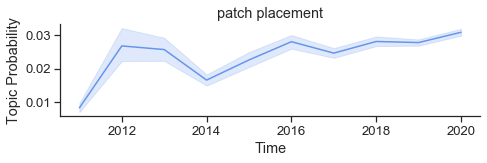

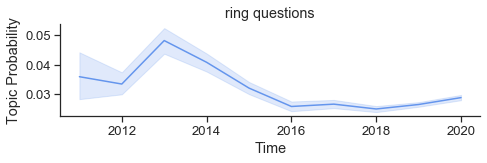

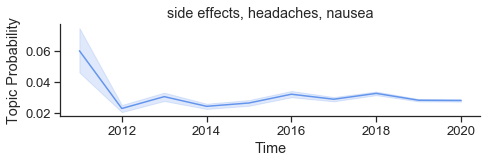

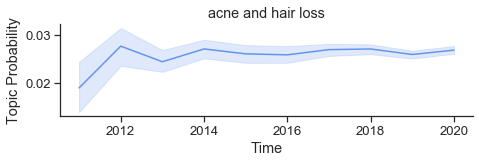

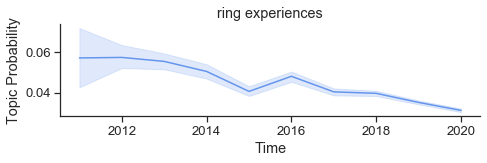

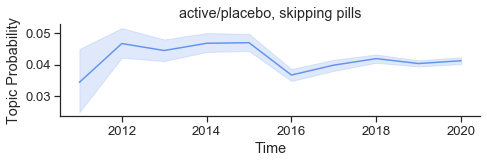

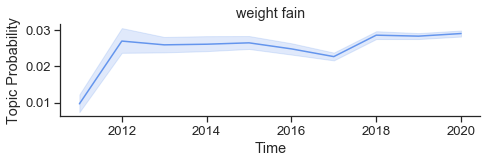

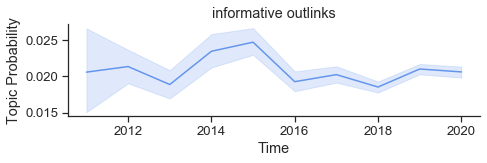

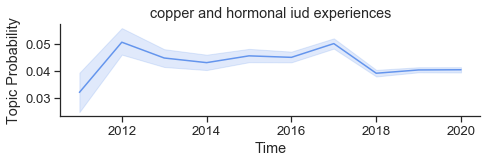

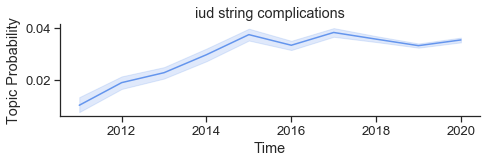

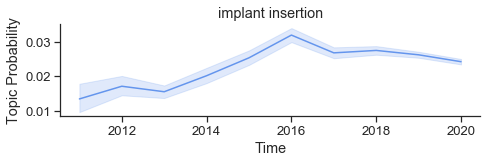

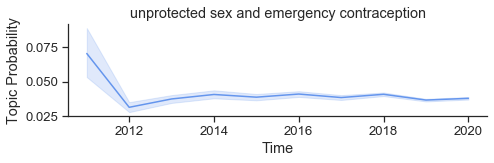

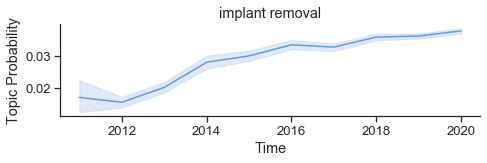

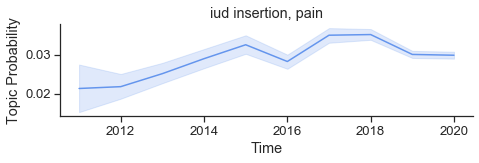

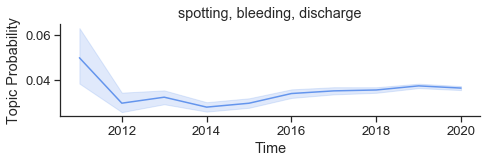

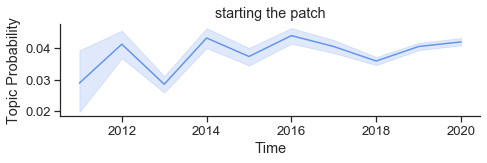

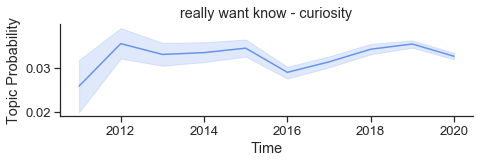

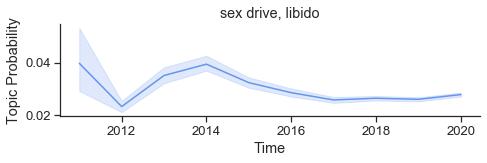

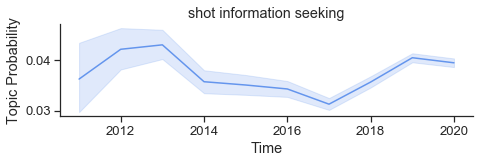

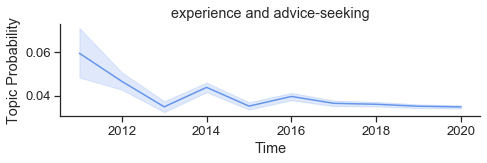

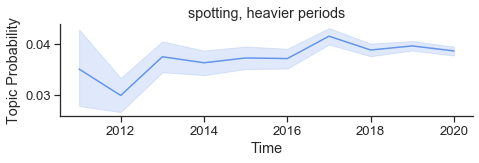

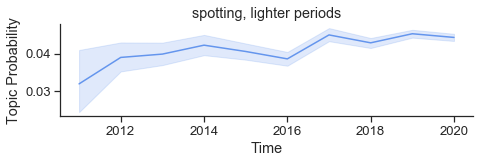

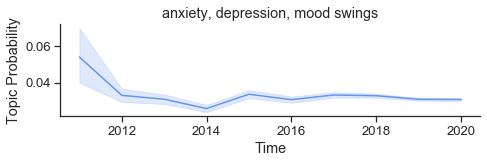

In [54]:
##unsampled output
for index in range(len(recoded_topics)):
    lmw.plot_topics_over_time(topic_distributions, recoded_topics, years, index, output_path=None)


## Topic Modeling - Under Sampled

In [5]:
posts_df = pd.read_csv("/Users/lm638/Box/birth-control-project/reddit/data/2020/pill-iud-implant-sampled-posts.csv")

In [6]:
posts_df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,year,flair,text,title,type,token_text,token_title,text_type,title_type,txt_title_type
0,0,13641,44ktcp,2016-02-07 08:49:44,2016.0,side effects!?,I've had nexaplanon for about four months now ...,nexaplanon woes,post,"[""i've"", 'had', 'nexaplanon', 'for', 'about', ...","['nexaplanon', 'woe']",implant,NaN,implant
1,1,87529,iuki9g,2020-09-17 14:26:19,2020.0,experience,I've had the nexplanon for almost 3 years now ...,does anyone else freak out about pregnancy whi...,post,"[""i've"", 'had', 'the', 'nexplanon', 'for', 'al...","['doe', 'anyone', 'else', 'freak', 'out', 'abo...",implant,NaN,implant
2,2,39244,9d2q8d,2018-09-05 03:42:01,2018.0,NaN,"This sounds crazy but I'd figure I'd ask, just...",nexplanon and razor burn?,post,"['this', 'sound', 'crazy', 'but', ""i'd"", 'figu...","['nexplanon', 'and', 'razor', 'burn?']",implant,implant,implant
3,3,14840,4khg3v,2016-05-22 06:16:05,2016.0,side effects!?,"I had my implanon put in last November, and it...",implanon causing pain when moving arm,post,"['i', 'had', 'my', 'implanon', 'put', 'in', 'l...","['implanon', 'causing', 'pain', 'when', 'movin...",implant,implant,implant
4,4,17043,5qh5pj,2017-01-27 13:43:45,2017.0,experience,I got nexplanon inserted 4 days ago and I want...,nexplanon- 4 days later,post,"['i', 'got', 'nexplanon', 'inserted', '4', 'da...","['nexplanon-', '4', 'day', 'later']",implant,NaN,implant


In [7]:
training_documents = []
dates = []

for i, _row in posts_df.iterrows():
    if not pd.isnull(_row['text']):
        training_documents.append(lmw.process_string(_row['text']))
        dates.append(_row['date'])
        
len(training_documents), len(dates)

(21000, 21000)

In [8]:
print(training_documents[20])

nexplanon almost month told expect irregular bleeding however haven irregular bleeding period normal possible nexplanon isn working irregular bleeding happen people know haven long want make sure


In [8]:

num_topics = 30
mallet_path = '/Users/lm638/Box/mallet-2.0.8/bin/mallet'
# GENRE OUTPUT PATHS
base_path = '/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-posts'


In [9]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                    base_path,
                  num_topics,
                  training_documents)


Importing data...
Complete
Training topic model...
Complete


In [9]:
topic_keys = lmw.load_topic_keys("/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-posts/mallet.topic_keys.30")
len(topic_keys)

30

In [10]:
topic_distributions = lmw.load_topic_distributions("/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-posts/mallet.topic_distributions.30")
print(len(topic_distributions[1]))

30


In [13]:
new_topics = recode_topics(topic_keys, training_data = posts_df["text"].to_list(), topic_distributions=topic_distributions)

In [14]:
len(new_topics)

30

In [16]:
new_topics

[['acne and skin concerns'],
 ['doctor appointments'],
 ['unprotected sex, pregnancy concerns'],
 ['curiosity, answer-seeking'],
 ['requests for advice, experiences'],
 ['informative outlinks, research'],
 ['costs, insurance, planned parenthood'],
 ['late period, pregnancy tests'],
 ['requests for iud experiences'],
 ['irregular bleeding, spotting'],
 ['requests for implant experiences'],
 ['iud insertion experience'],
 ['anxiety, depression, mood swings'],
 ['weight gain, loss'],
 ['skipping pills, placebo, active'],
 ['migraines, hormones, dosage'],
 ['condom-use, pregnancy concerns'],
 ['hair loss, side effects'],
 ['heavy, light, changes in cycle'],
 ['seeking similar experiences'],
 ['changes in discharge, yeast infections'],
 ['implant removal, replacement'],
 ['effectiveness, temperature'],
 ['pain, cramping iud'],
 ['pain, implant insertion'],
 ['sex drive'],
 ['advice on choosing a method'],
 ['pill timing'],
 ['hormonal vs. copper iud'],
 ['feeling iud strings']]

In [18]:
datetimes =[]
for x in dates:
    #datetime_obj = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    datetime_obj = datetime.fromisoformat(x)
    datetimes.append(datetime_obj)
    
years=[]
for datetime in datetimes:
    years.append(datetime.year)

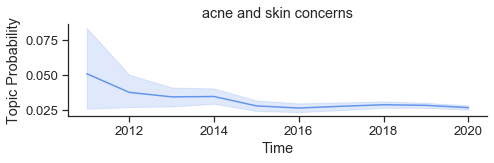

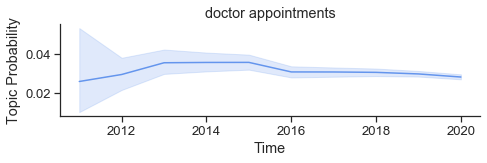

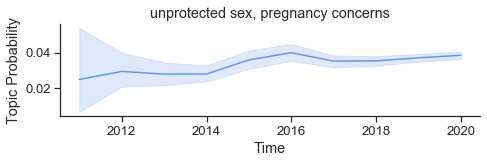

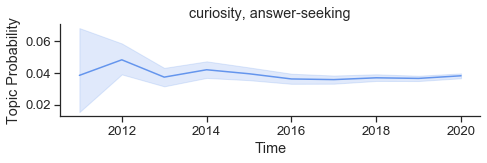

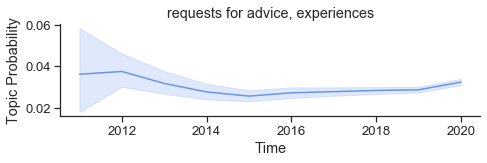

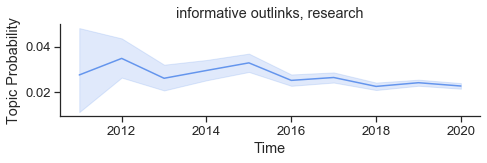

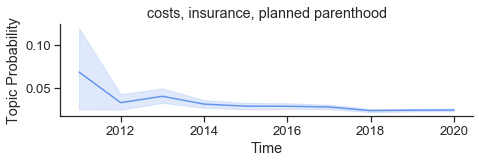

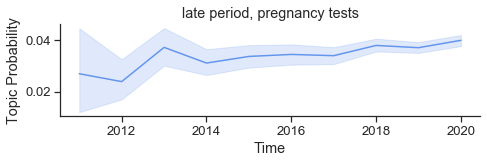

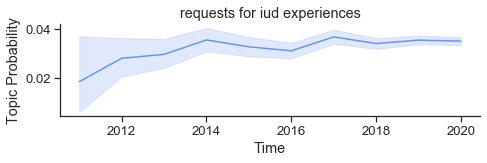

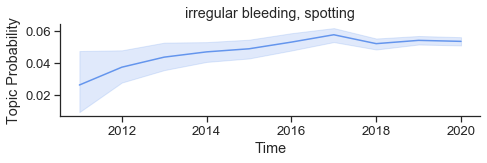

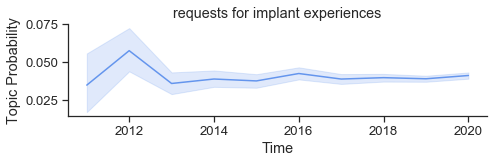

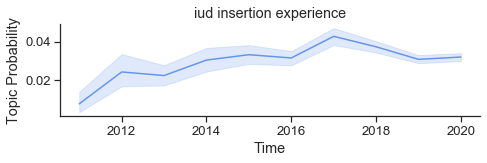

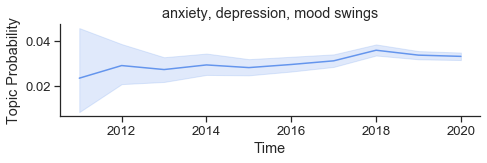

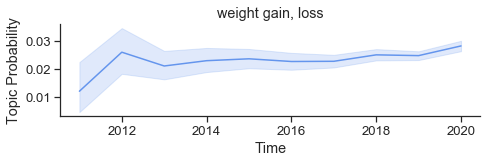

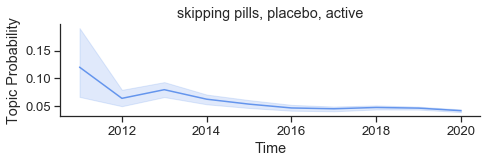

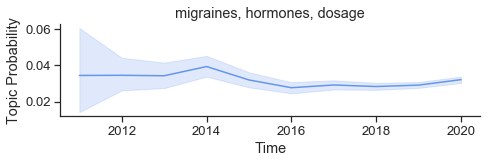

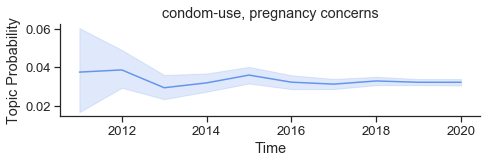

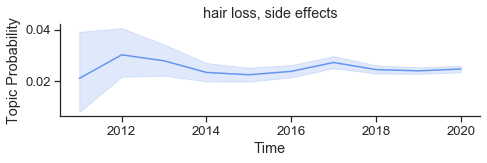

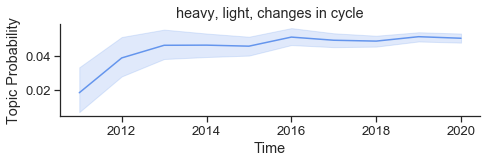

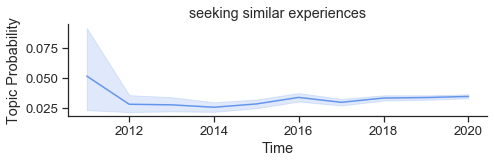

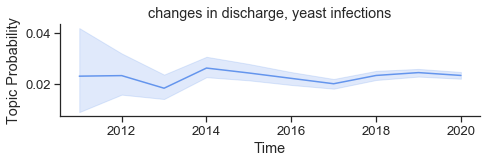

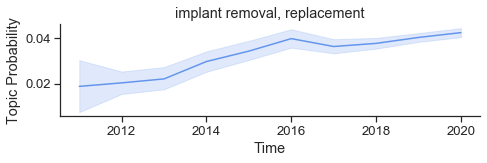

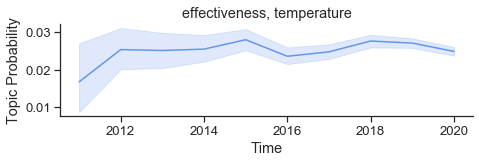

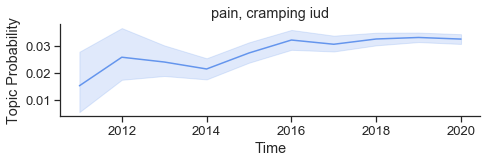

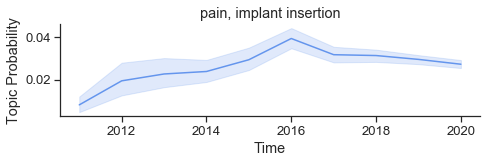

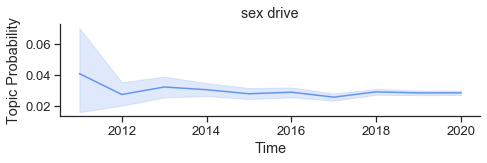

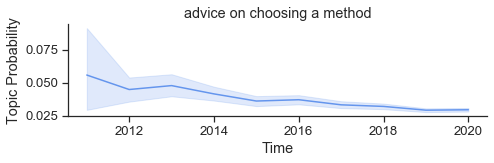

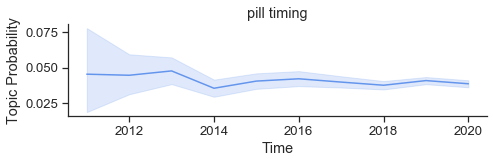

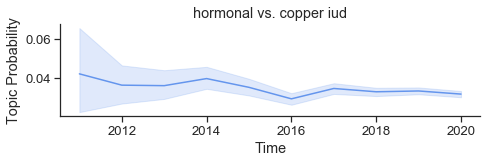

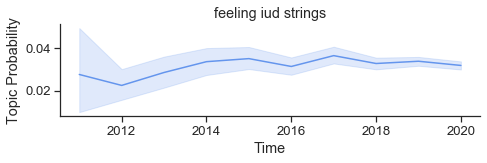

In [19]:
##unsampled output
for index in range(len(new_topics)):
    lmw.plot_topics_over_time(topic_distributions, new_topics, years, index, output_path=None)
    #break

## Plotting Type vs. Topics

In [47]:
flair = posts_df["flair"].to_list()
print(len(flair))

21000


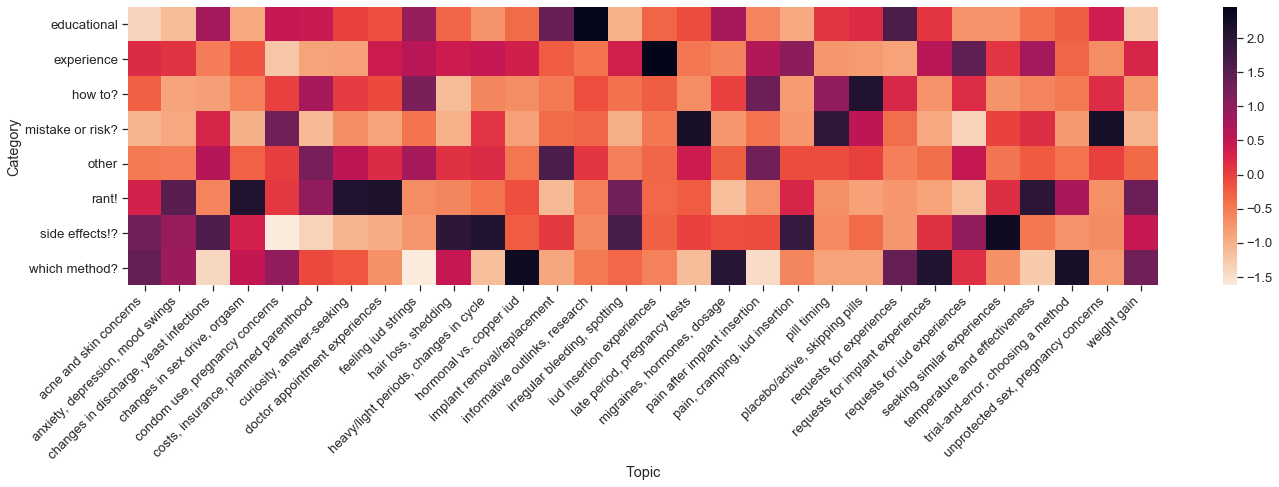

In [48]:

lmw.plot_categories_by_topics_heatmap(flair, topic_distributions, new_topics, output_path=None, target_labels=None, dim=(20,7))



/Users/lm638/anaconda3/lib/python3.7/site-packages/little_mallet_wrapper/little_mallet_wrapper.py:217: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


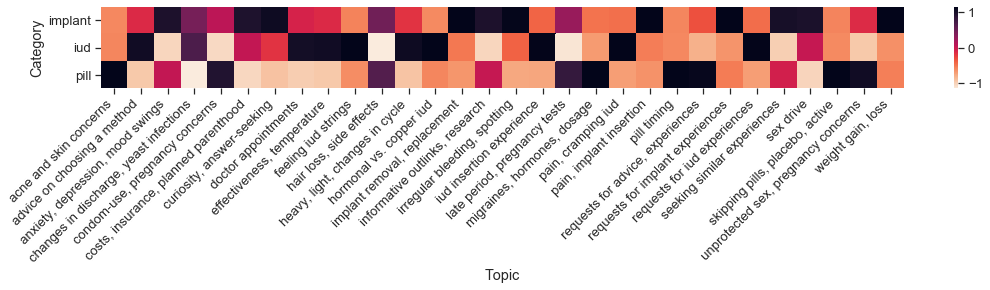

In [23]:
##using txt_title_type
types = posts_df['txt_title_type'].to_list()
lmw.plot_categories_by_topics_heatmap(types, topic_distributions, new_topics, output_path=None, target_labels=None, dim=(18,1.5))


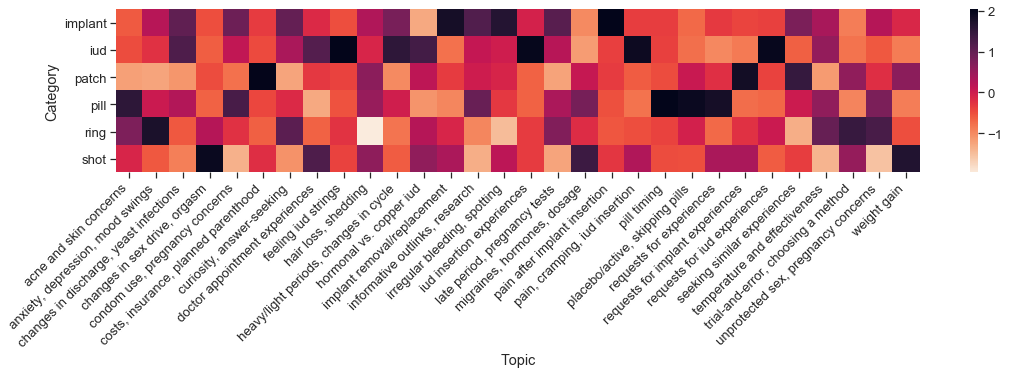

In [59]:
##using title_type

types = posts_df['title_type'].to_list()
lmw.plot_categories_by_topics_heatmap(types, topic_distributions, new_topics, output_path=None, target_labels=None, dim=(18,3))


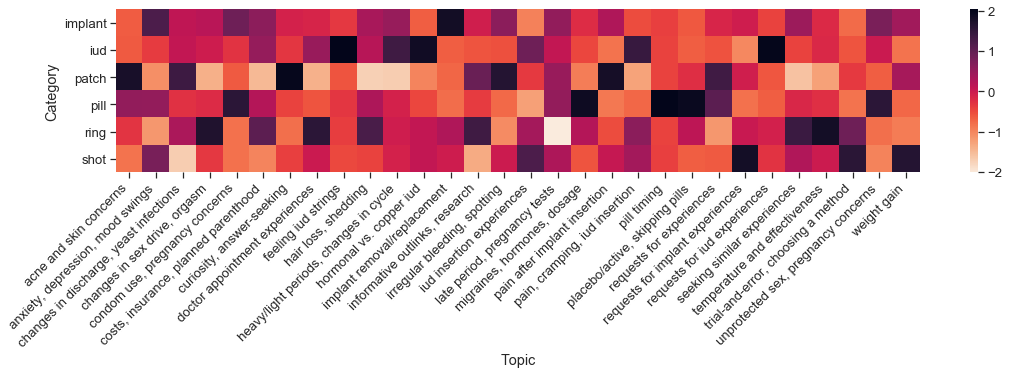

In [60]:
##using text_type
types = posts_df['text_type'].to_list()
lmw.plot_categories_by_topics_heatmap(types, topic_distributions, new_topics, output_path=None, target_labels=None, dim=(18,3))


## Applying Undersampled Model to Entire Dataset

In [33]:
path_to_mallet = mallet_path
path_to_original_model = "/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-posts/mallet.model.30"
path_to_training_data = "/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-model-to-entire-dataset/training.txt"
path_to_formatted_training_data = "/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-model-to-entire-dataset/mallet.training"
path_to_new_topic_distributions     = "/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-model-to-entire-dataset/mallet.topic_distributions.30"
posts_df = pd.read_csv("/Users/lm638/Box/birth-control-project/reddit/data/2020/un-sampled-posts.csv")

training_data = []
dates = []

for i, _row in posts_df.iterrows():
    if not pd.isnull(_row['text']):
        training_data.append(lmw.process_string(_row['text']))
        dates.append(_row['date'])
        
print(len(training_data), len(dates))


lmw.import_data(path_to_mallet, 
            path_to_training_data, 
            path_to_formatted_training_data, 
            training_data, 
            "/Users/lm638/Box/birth-control-project/reddit/scripts/2020-scripts/mallet-output/undersampled-posts/mallet.training")




89035 89035
Importing data using pipe...
Complete


In [70]:


lmw.infer_topics(path_to_mallet, 
             path_to_original_model, 
             path_to_formatted_training_data, 
             path_to_new_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [71]:
topic_distributions = lmw.load_topic_distributions(path_to_new_topic_distributions)

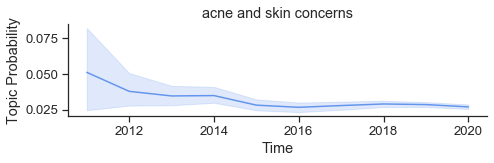

In [21]:
#for index in range(len(new_topics)):
   # path = "/Users/lm638/Box/birth-control-project/visuals/topics_over_time"+ str(new_topics[index])
lmw.plot_topics_over_time(topic_distributions, new_topics, years, 0, output_path=None)

In [67]:
def plot_topics_over_time(topic_distributions, topic_keys, times, topic_index, output_path=None):
    
    data_dicts = []
    print("making data_dicts")
    for j, _distribution in enumerate(topic_distributions): 
        #print(j, _distribution)
        for _topic, _probability in enumerate(_distribution):
            if _topic == topic_index:
                data_dicts.append({'Probability': _probability,
                                   'Time': times[j]})
    print("data_dicts assembled")
    data_df = pd.DataFrame(data_dicts)
    print(data_df.head())

    sns.set(style='ticks', font_scale=1.4)
    print("style set")
    plt.figure(figsize=(7,2.5))
    print("figure set")
    sns.lineplot(data=data_df, 
                 x='Time', 
                 y='Probability', 
                 color='cornflowerblue')
    print("plotting axes")
    plt.show()
    #plt.xlabel('Time')
    plt.ylabel('Topic Probability')
    plt.title(' '.join(topic_keys[topic_index][:5]))
    plt.tight_layout()
    sns.despine()
    print("despined")
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [34]:
topics_dicts = []

for _type, _distribution in zip(types, topic_distributions):   
    for _topic_index, _topic_label in enumerate(new_topics):    
        topics_dicts.append({'Type': _type,
                             'Topic Index': _topic_index,
                             'Topic': _topic_index,
                             'Topic Name': _topic_label[0],
                             'Topic Probability': _distribution[_topic_index]})
topics_df = pd.DataFrame(topics_dicts)
print(len(topics_df.index))
topics_df.sample(5)

630000


,Type,Topic Index,Topic,Topic Name,Topic Probability
108413,implant,23,23,"pain, cramping iud",0.010606
464589,pill,9,9,"irregular bleeding, spotting",0.018207
568031,pill,11,11,iud insertion experience,0.012681
334453,iud,13,13,"weight gain, loss",0.002110
463267,pill,7,7,"late period, pregnancy tests",0.147154


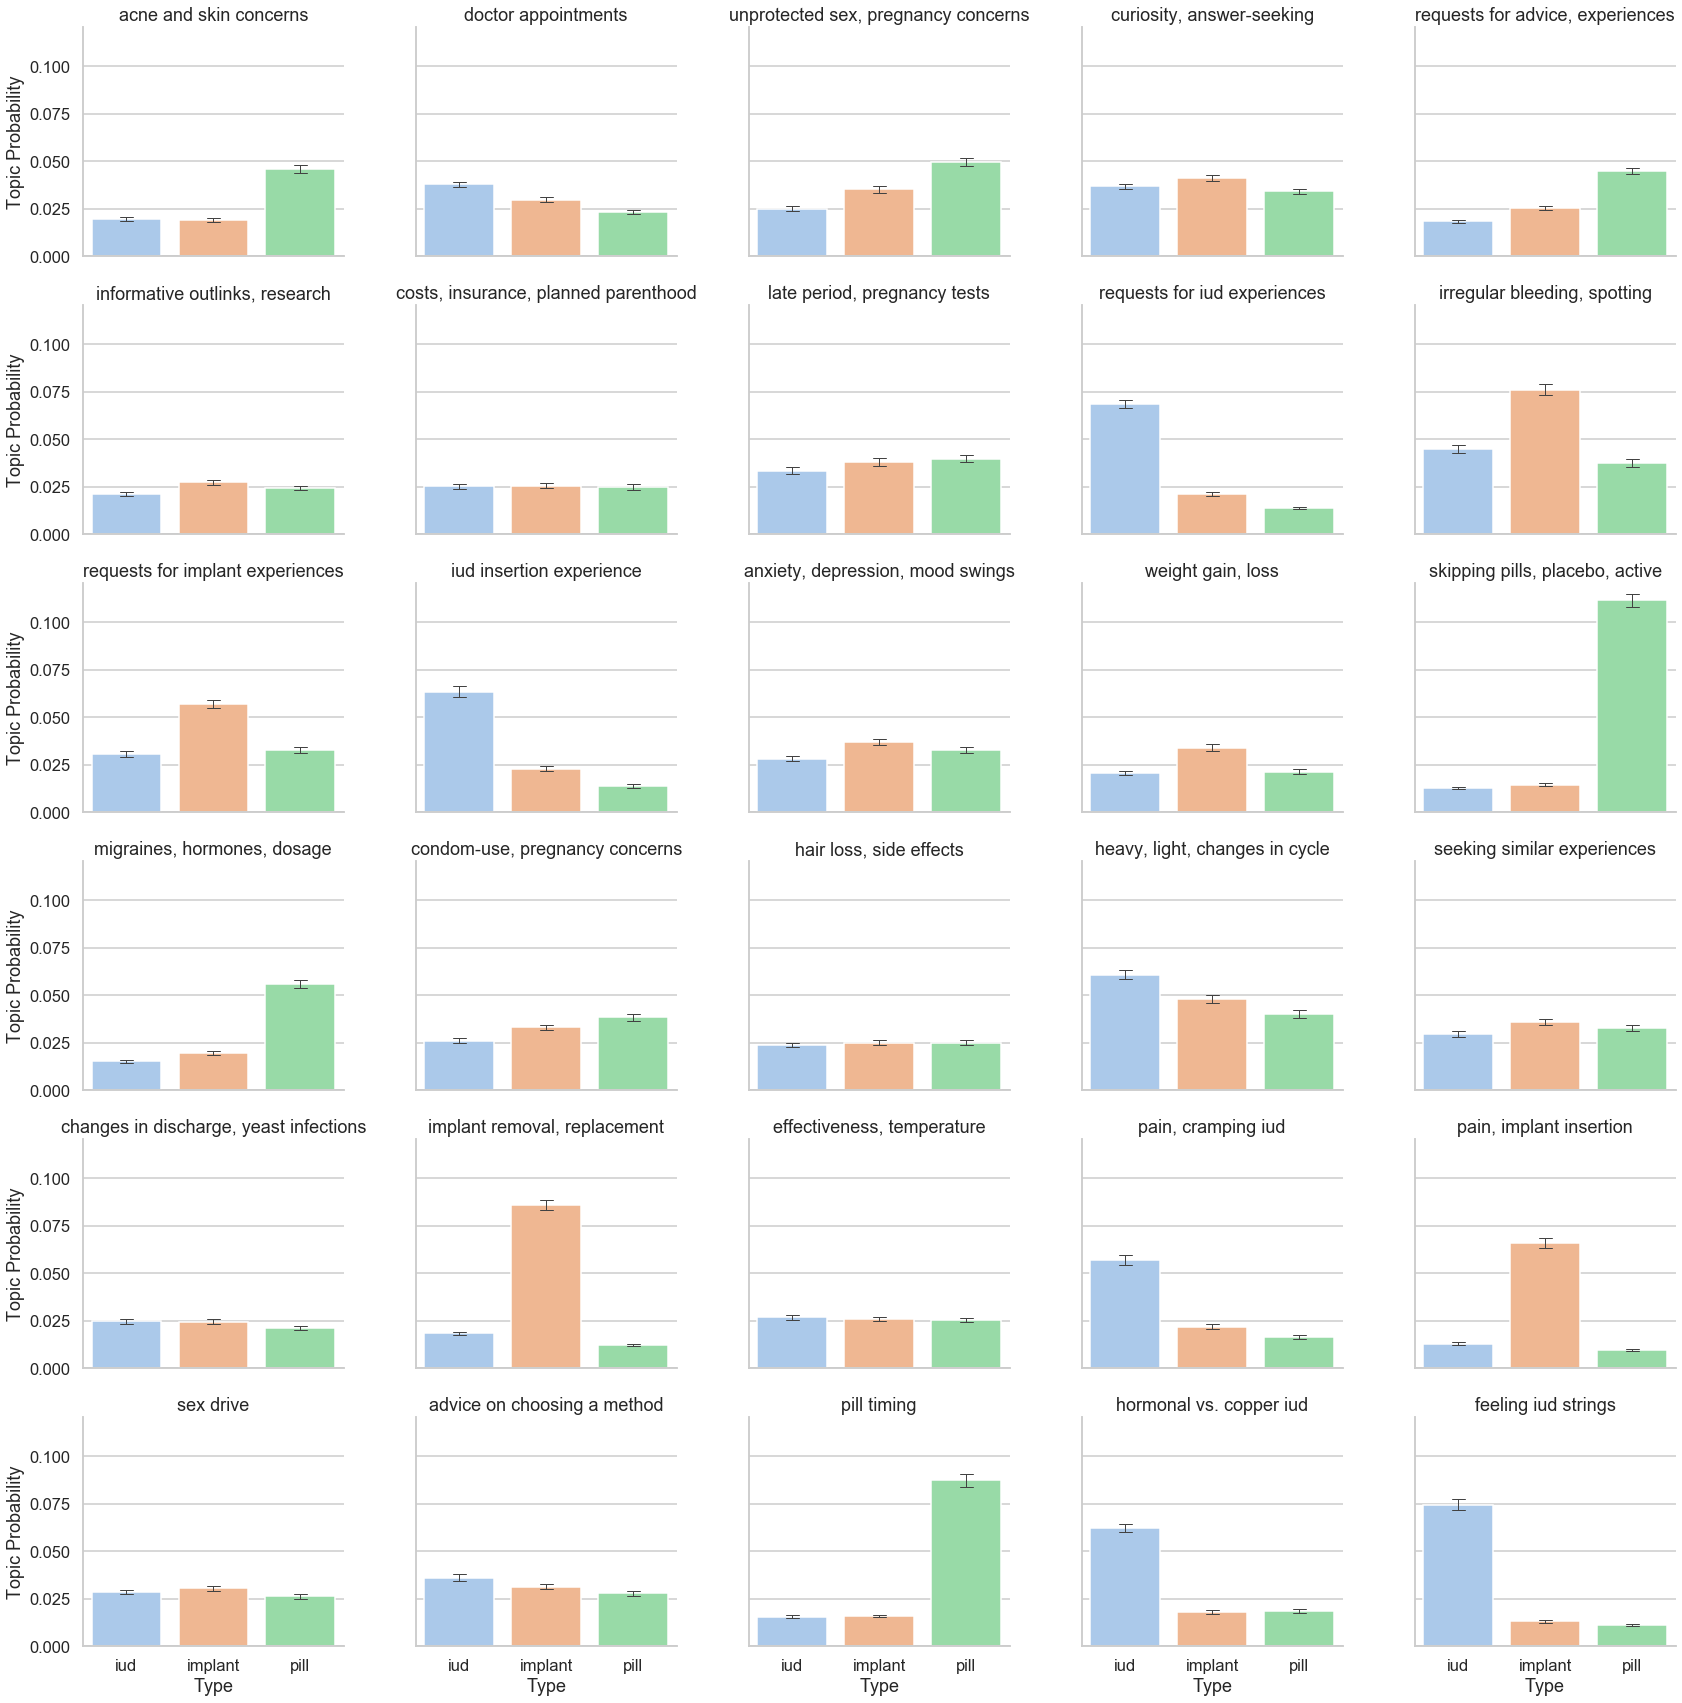

In [118]:
#plt.figure(figsize=(30,50))
sns.set(style='whitegrid', context="talk")
g = sns.FacetGrid(topics_df, col='Topic Name', col_wrap=5, height=4, aspect=1.2, sharex=True)
g.map_dataframe(sns.barplot, 
      'Type', 
      'Topic Probability', 
      palette='pastel', 
      errwidth=1, 
      capsize=0.15, 
     order=["iud","implant","pill"])
g.set_axis_labels("Type", "Topic Probability")
g.set_titles(col_template="{col_name}")
#g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")

plt.tight_layout()
#plt.savefig(output_directory_path + '/plots/facetgrid.bc_type_x_topics.pdf', bbox_inches='tight')